In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import seaborn as sns

In [2]:
xls = pd.ExcelFile('../Dados/ANDA_2018_2019_2020_anonimizado.xlsx')
df_2018 = pd.read_excel(xls, '2018')
df_2019 = pd.read_excel(xls, '2019')
df_2020 = pd.read_excel(xls, '2020')

In [3]:
frames = [df_2018, df_2019, df_2020]


data_df = pd.concat(frames)

In [4]:
data_df["Hora Início Viagem"] = pd.to_datetime(data_df['Hora Início Viagem'], format="%Y-%m-%d %H:%M:%S")
data_df["Hora Fim Viagem"] = pd.to_datetime(data_df['Hora Início Viagem'], format="%Y-%m-%d %H:%M:%S")

In [5]:
data_df["Ano do Início Viagem"] = data_df["Hora Início Viagem"].dt.year
data_df["Mês do Início Viagem"] = data_df["Hora Início Viagem"].dt.month
data_df["Dia do Início Viagem"] = data_df["Hora Início Viagem"].dt.day

data_df["Hora do Início Viagem"] = data_df["Hora Início Viagem"].dt.hour

In [6]:
data_df["Ano do Início Viagem"].value_counts()

2019    700446
2018    246937
2020    126537
Name: Ano do Início Viagem, dtype: int64

In [7]:
data_df['Viagem'].groupby([data_df["Dia do Início Viagem"],data_df["Mês do Início Viagem"], data_df["Ano do Início Viagem"]]).agg('count')

Dia do Início Viagem  Mês do Início Viagem  Ano do Início Viagem
1                     1                     2020                     798
                      2                     2019                    2018
                                            2020                    1103
                      3                     2019                    2419
                      4                     2019                    2453
                                                                    ... 
31                    8                     2019                    1057
                      10                    2018                    1898
                                            2019                    2938
                      12                    2018                    1202
                                            2019                    1530
Name: Viagem, Length: 608, dtype: int64

In [8]:
data_df['data_inicio_viagem'] = data_df[['Ano do Início Viagem', 'Mês do Início Viagem', 'Dia do Início Viagem']].apply(lambda s : datetime.datetime(*s),axis = 1)
data_df['data_inicio_viagem_with_hour'] = data_df[['Ano do Início Viagem', 'Mês do Início Viagem', 'Dia do Início Viagem', 'Hora do Início Viagem']].apply(lambda s : datetime.datetime(*s),axis = 1)

In [9]:
data_df['data_inicio_viagem']

0        2018-12-01
1        2018-11-26
2        2018-12-12
3        2018-11-02
4        2018-11-08
            ...    
126532   2020-01-15
126533   2020-02-04
126534   2020-02-07
126535   2020-01-21
126536   2020-02-13
Name: data_inicio_viagem, Length: 1073920, dtype: datetime64[ns]

In [10]:
opsd_daily = data_df.set_index('data_inicio_viagem')
opsd_daily.head(3)

,UserHash,Fabricante,Marca,Modelo,Versão SO,Modelo Comercial,Grupo do Cliente,Viagem,Hora Início Viagem,Hora Fim Viagem,...,Grupo de Título,Perfil Social,Número de Zonas,Lista de Zonas,Resultado do Processamento,Ano do Início Viagem,Mês do Início Viagem,Dia do Início Viagem,Hora do Início Viagem,data_inicio_viagem_with_hour
data_inicio_viagem,,,,,,,,,,,,,,,,,,,,,
2018-12-01,61766494020eb0212a37c616b80aafc6a50f2c4f,bq,bq,Aquaris X Pro,8.1.0 REL 717,Aquaris X Pro,Outros,0BEDC3B4-90FB-404B-96EB-000085324876,2018-12-01 19:13:52,2018-12-01 19:13:52,...,Assinatura,Normal,2.0,C1 C6,Viagem não partida,2018,12,1,19,2018-12-01 19:00:00
2018-11-26,3d620a4aa104d62256ebf875a16086d48ae892b8,HUAWEI,HUAWEI,FIG-LX1,8.0.0 REL 135(C33),FIG-LX1,Outros,95D5630E-98F8-4283-A322-0000AE102052,2018-11-26 16:45:22,2018-11-26 16:45:22,...,Título de Viagem,NaN,6.0,NaN,Viagem não partida,2018,11,26,16,2018-11-26 16:00:00
2018-12-12,273e1ebc2df326f958b0495f7fb0c5c9f280298b,HMD Global,Nokia,TA-1004,9 REL 00WW_5_15G,Nokia 8,Outros,8EE1024C-A5E9-468E-A14B-00040FAAF55A,2018-12-12 18:28:27,2018-12-12 18:28:27,...,Assinatura,Normal,2.0,C1 C2,Viagem não partida,2018,12,12,18,2018-12-12 18:00:00


- Plot número de viagens por dia/mês/ano (plot para cada ano);
- Descobrir que utilizadores são mais frequentes nestes anos;
    - Quais os meses/anos que viajaram mais;

In [11]:
opsd_daily["counter"] = opsd_daily['Viagem'].groupby(opsd_daily.index.date).count()

- Número de viagens por dia;

In [12]:
opsd_daily["counter"]

data_inicio_viagem
2018-12-01    1298
2018-11-26    2133
2018-12-12    2044
2018-11-02    1618
2018-11-08    1980
              ... 
2020-01-15    2516
2020-02-04    2671
2020-02-07    2681
2020-01-21    2650
2020-02-13    2810
Name: counter, Length: 1073920, dtype: int64

<AxesSubplot:xlabel='data_inicio_viagem'>

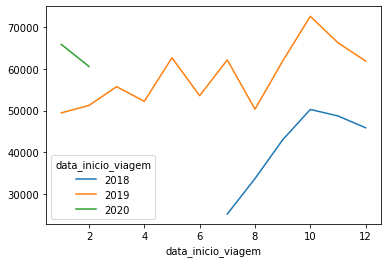

In [13]:
pv = pd.pivot_table(opsd_daily, index=opsd_daily.index.month, columns=opsd_daily.index.year, values='Viagem', aggfunc='count')

pv.plot()

In [14]:
pv

data_inicio_viagem,2018,2019,2020
data_inicio_viagem,,,
1,NaN,49488.0,65917.0
2,NaN,51276.0,60620.0
3,NaN,55774.0,NaN
4,NaN,52265.0,NaN
5,NaN,62702.0,NaN
6,NaN,53609.0,NaN
7,25233.0,62192.0,NaN
8,33720.0,50373.0,NaN
9,43022.0,61903.0,NaN


In [15]:
df_2018 = opsd_daily[opsd_daily.index.year == 2018]
print("Total de viagens em 2018: ", df_2018["Viagem"].count())

df_2019 = opsd_daily[opsd_daily.index.year == 2019]
print("Total de viagens em 2019: ",df_2019["Viagem"].count())

df_2020 = opsd_daily[opsd_daily.index.year == 2020]
print("Total de viagens em 2020: ",df_2020["Viagem"].count())

Total de viagens em 2018:  246937
Total de viagens em 2019:  700446
Total de viagens em 2020:  126537


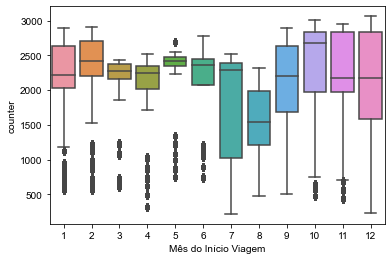

In [16]:
sns.boxplot(x = 'Mês do Início Viagem', y='counter', data = opsd_daily)
sns.set(rc={'figure.figsize':(15,12)})

<AxesSubplot:xlabel='data_inicio_viagem', ylabel='counter'>

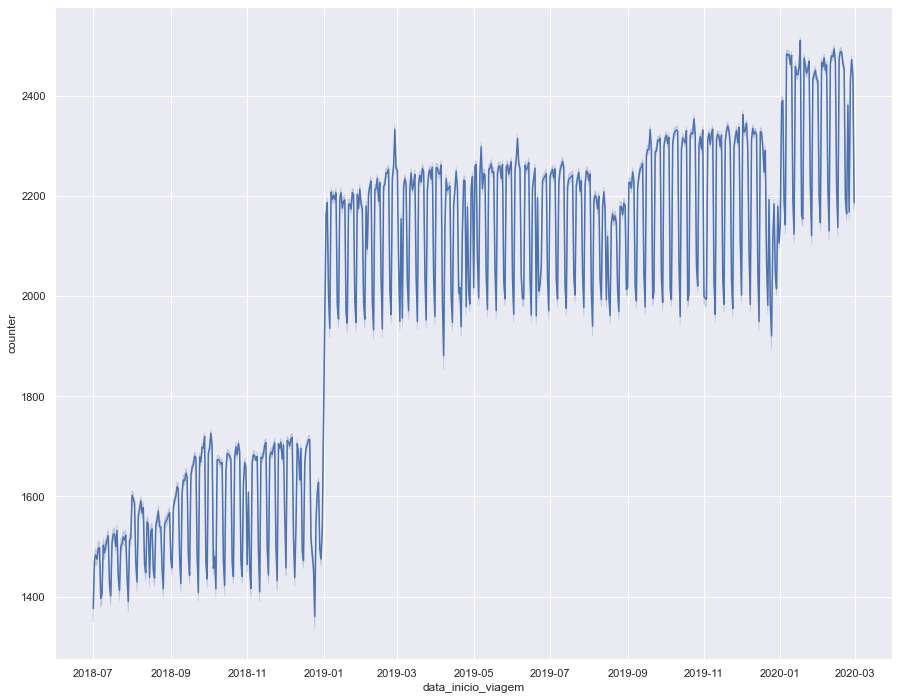

In [17]:
ma = opsd_daily["counter"].rolling(window=6).mean() 
sns.lineplot(data = ma)

* Média por mês de viagens

In [18]:
x = opsd_daily.groupby(["Ano do Início Viagem", "Mês do Início Viagem"])["counter"].mean()
df_wide = x.unstack()
df_wide.head()

Mês do Início Viagem,1,2,3,4,5,6,7,8,9,10,11,12
Ano do Início Viagem,,,,,,,,,,,,
2018,NaN,NaN,NaN,NaN,NaN,NaN,894.572861,1196.668387,1655.980196,1843.928138,1877.607508,1747.025922
2019,1891.984643,2094.358023,2061.320544,2047.083995,2232.652164,2081.088642,2189.040777,1804.962242,2329.235336,2624.601322,2552.399029,2385.364030
2020,2426.360044,2410.113725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Alguns comandos para filtrar

In [19]:
# filter by a date range
opsd_daily.loc["2019-01-01": "2019-12-01"]# filter by month
opsd_daily.loc["2020-01"]# filter by month range
opsd_daily.loc["2020-01": "2020-05"]# filter by year
opsd_daily.loc["2018"]# filter by year range
opsd_daily.loc["2018": "2020"].head()

,UserHash,Fabricante,Marca,Modelo,Versão SO,Modelo Comercial,Grupo do Cliente,Viagem,Hora Início Viagem,Hora Fim Viagem,...,Perfil Social,Número de Zonas,Lista de Zonas,Resultado do Processamento,Ano do Início Viagem,Mês do Início Viagem,Dia do Início Viagem,Hora do Início Viagem,data_inicio_viagem_with_hour,counter
data_inicio_viagem,,,,,,,,,,,,,,,,,,,,,
2018-12-01,61766494020eb0212a37c616b80aafc6a50f2c4f,bq,bq,Aquaris X Pro,8.1.0 REL 717,Aquaris X Pro,Outros,0BEDC3B4-90FB-404B-96EB-000085324876,2018-12-01 19:13:52,2018-12-01 19:13:52,...,Normal,2.0,C1 C6,Viagem não partida,2018,12,1,19,2018-12-01 19:00:00,1298
2018-11-26,3d620a4aa104d62256ebf875a16086d48ae892b8,HUAWEI,HUAWEI,FIG-LX1,8.0.0 REL 135(C33),FIG-LX1,Outros,95D5630E-98F8-4283-A322-0000AE102052,2018-11-26 16:45:22,2018-11-26 16:45:22,...,NaN,6.0,NaN,Viagem não partida,2018,11,26,16,2018-11-26 16:00:00,2133
2018-12-12,273e1ebc2df326f958b0495f7fb0c5c9f280298b,HMD Global,Nokia,TA-1004,9 REL 00WW_5_15G,Nokia 8,Outros,8EE1024C-A5E9-468E-A14B-00040FAAF55A,2018-12-12 18:28:27,2018-12-12 18:28:27,...,Normal,2.0,C1 C2,Viagem não partida,2018,12,12,18,2018-12-12 18:00:00,2044
2018-11-02,f3cf33f75b1aaa186e710c2e338fdb80e2b8191f,samsung,samsung,SM-A520F,8.0.0 REL A520FXXU5CRGB,Galaxy A5(2017),Outros,4BE076C5-3F5A-4B9A-87AE-00035CAC4BC5,2018-11-02 11:47:56,2018-11-02 11:47:56,...,NaN,2.0,NaN,Viagem não partida,2018,11,2,11,2018-11-02 11:00:00,1618
2018-11-08,a162a334bbbb6dfc7e06eaea00726ff2c150486b,OnePlus,OnePlus,ONEPLUS A3003,8.0.0 REL 1808161403,NaN,Outros,430E5E21-3969-4937-8840-00067532471F,2018-11-08 18:15:08,2018-11-08 18:15:08,...,Normal,3.0,C1 C6 S8,Viagem não partida,2018,11,8,18,2018-11-08 18:00:00,1980


<AxesSubplot:xlabel='data_inicio_viagem', ylabel='counter'>

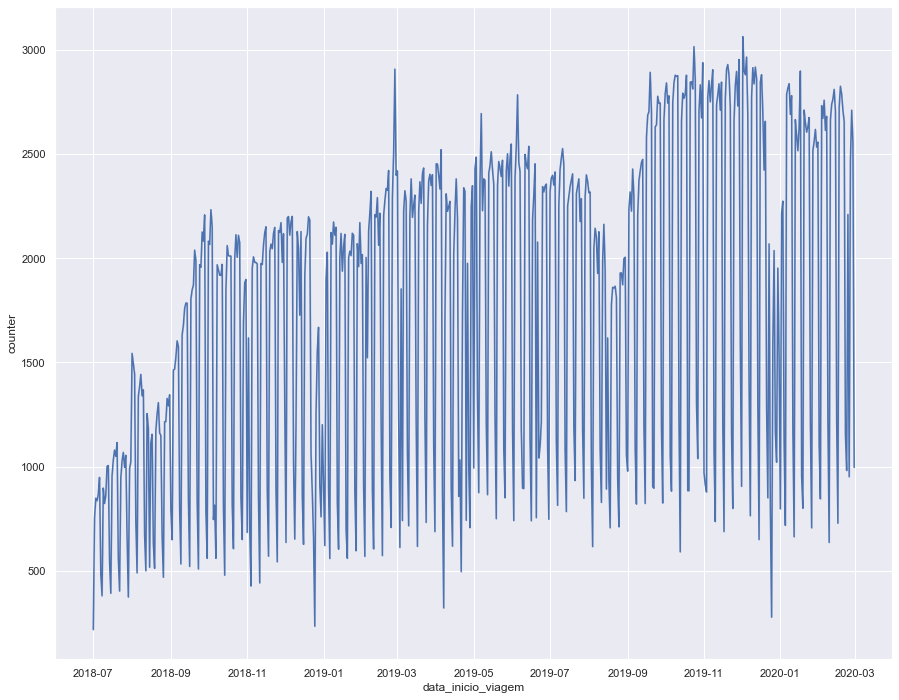

In [20]:
drange = opsd_daily.loc["2018": "2020"]
sns.lineplot(data = drange["counter"])

In [21]:
opsd_daily["counter"].resample("M").mean()

data_inicio_viagem
2018-07-31     894.572861
2018-08-31    1196.668387
2018-09-30    1655.980196
2018-10-31    1843.928138
2018-11-30    1877.607508
2018-12-31    1747.025922
2019-01-31    1891.984643
2019-02-28    2094.358023
2019-03-31    2061.320544
2019-04-30    2047.083995
2019-05-31    2232.652164
2019-06-30    2081.088642
2019-07-31    2189.040777
2019-08-31    1804.962242
2019-09-30    2329.235336
2019-10-31    2624.601322
2019-11-30    2552.399029
2019-12-31    2385.364030
2020-01-31    2426.360044
2020-02-29    2410.113725
Freq: M, Name: counter, dtype: float64

-------------------------------------------------

In [22]:
opsd_daily['mes_ano'] = opsd_daily.index.map(lambda x: '{year}-{month}'.format(year=x.year,
                                                              month=x.month,
                                                              day=x.day))

In [23]:
opsd_daily['user_id'] = pd.factorize( opsd_daily['UserHash'] )[0]

In [24]:
opsd_daily["Viagem"].groupby([opsd_daily["user_id"], opsd_daily.index]).count()

user_id  data_inicio_viagem
0        2018-07-02            4
         2018-07-03            4
         2018-07-05            4
         2018-07-06            2
         2018-07-09            4
                              ..
10017    2020-02-17            1
10018    2020-02-29            1
10019    2020-02-04            1
10020    2020-02-13            1
10021    2020-01-31            1
Name: Viagem, Length: 424459, dtype: int64

In [25]:
count_user_trips = opsd_daily.groupby(['user_id', 'mes_ano']).mes_ano.count().reset_index(name='count')
count_user_trips

,user_id,mes_ano,count
0,0,2018-10,76
1,0,2018-11,76
2,0,2018-12,74
3,0,2018-7,70
4,0,2018-8,74
...,...,...,...
57361,10017,2020-2,1
57362,10018,2020-2,1
57363,10019,2020-2,1
57364,10020,2020-2,1


In [26]:
count_user_trips.loc[count_user_trips['count'] > 20].sort_values(by='user_id', ascending=True)

,user_id,mes_ano,count
0,0,2018-10,76
17,0,2019-9,42
15,0,2019-7,23
14,0,2019-6,22
10,0,2019-2,43
...,...,...,...
57086,9779,2020-2,39
57096,9786,2020-2,27
57107,9796,2020-2,31
57119,9807,2020-2,24


In [27]:
# get top 10 most frequent UserIDs
n = 10
most_freq_users = count_user_trips['user_id'].value_counts()[:n].index.tolist()

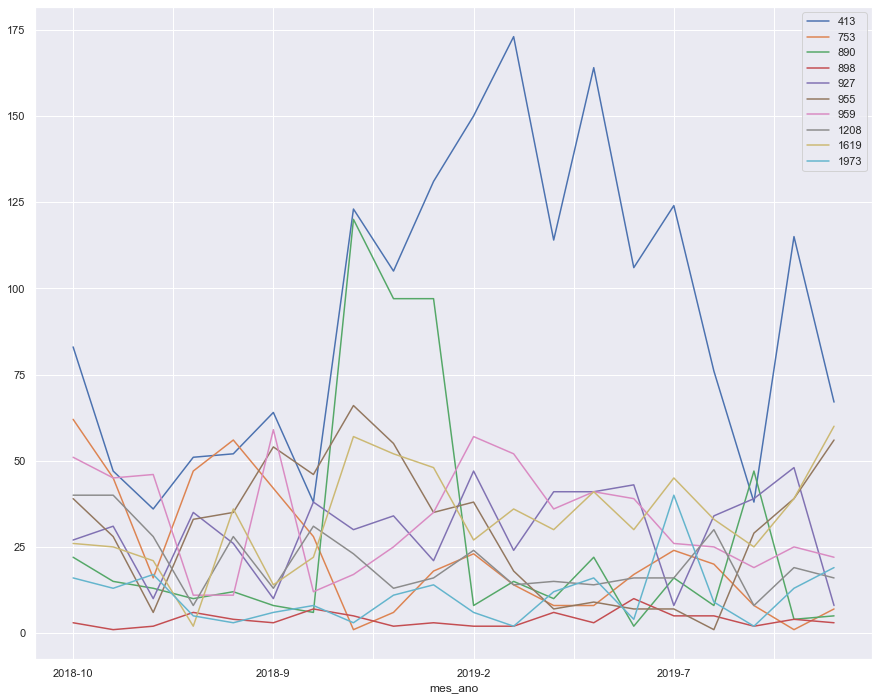

In [28]:
most_freq_df = count_user_trips.loc[count_user_trips["user_id"].isin(most_freq_users)]

fig, ax = plt.subplots()
names = most_freq_df.user_id.unique()
most_freq_df.reset_index().groupby('user_id').plot(x='mes_ano', y='count', ax=ax)
plt.legend(names)

plt.show()

In [29]:
data_df["Hora_min do Início Viagem"] = data_df["Hora Início Viagem"].dt.strftime('%H:%M')
data_df["Hora_min do Início Viagem"]

0         19:13
1         16:45
2         18:28
3         11:47
4         18:15
          ...  
126532    08:08
126533    19:30
126534    04:00
126535    16:16
126536    20:05
Name: Hora_min do Início Viagem, Length: 1073920, dtype: object

<AxesSubplot:xlabel='Hora do Início Viagem'>

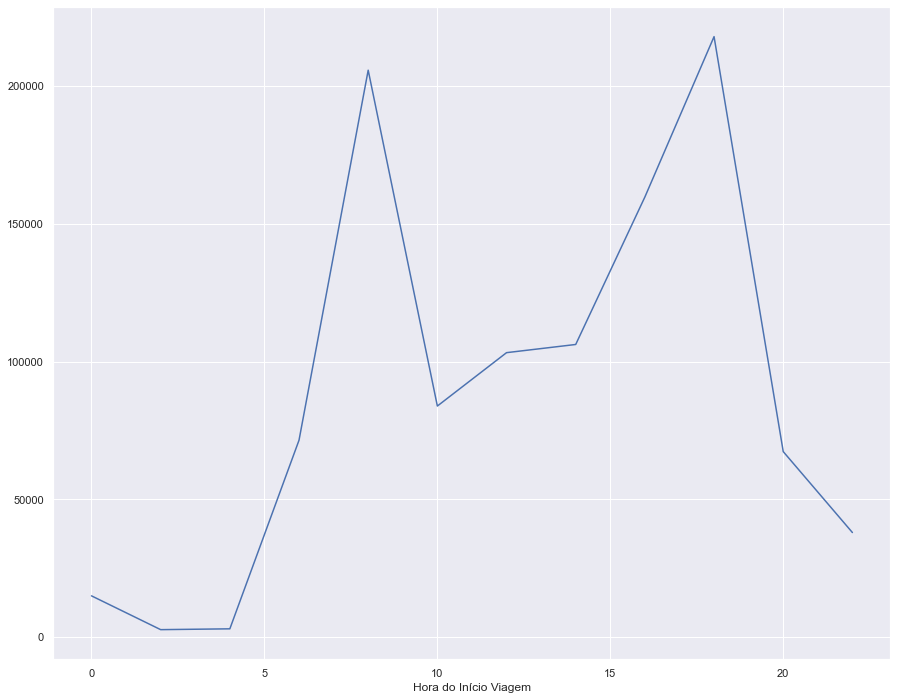

In [30]:
hour_interval_analysis = data_df.groupby(pd.Grouper(key='Hora Início Viagem',freq='120min'))["Viagem"].count().reset_index()
hour_interval_analysis['Hora do Início Viagem'] = hour_interval_analysis['Hora Início Viagem'].apply(lambda x: x.hour)

hour_interval_analysis.groupby("Hora do Início Viagem")['Viagem'].sum().plot()

<AxesSubplot:xlabel='Hora do Fim Etapa'>

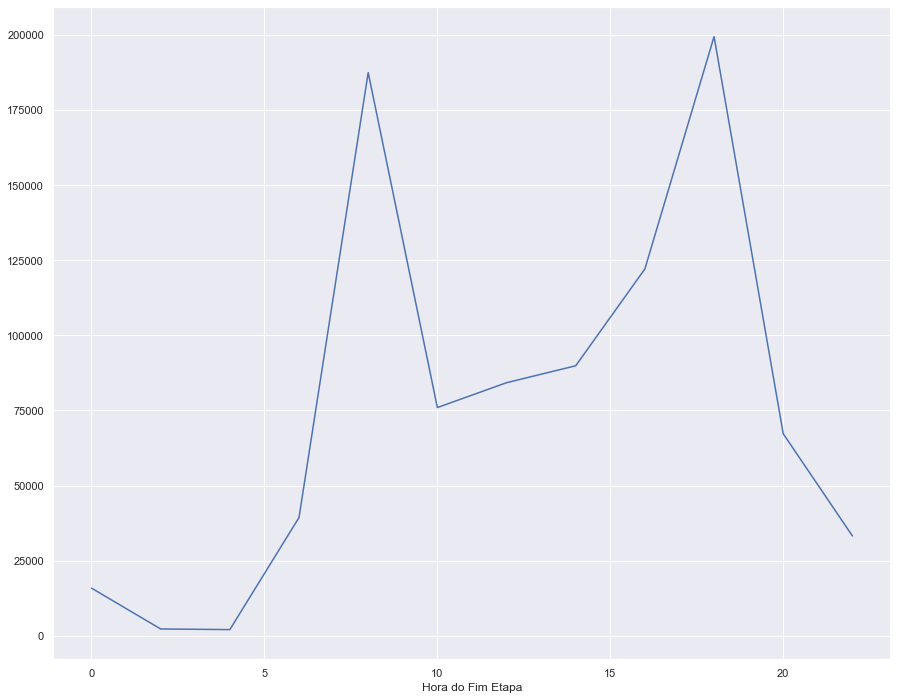

In [199]:
hour_interval_analysis = data_df.groupby(pd.Grouper(key='Hora Fim Etapa',freq='120min'))["Viagem"].count().reset_index()
hour_interval_analysis['Hora do Fim Etapa'] = hour_interval_analysis['Hora Fim Etapa'].apply(lambda x: x.hour)

hour_interval_analysis.groupby("Hora do Fim Etapa")['Viagem'].sum().plot()

<AxesSubplot:xlabel='Dia da Semana'>

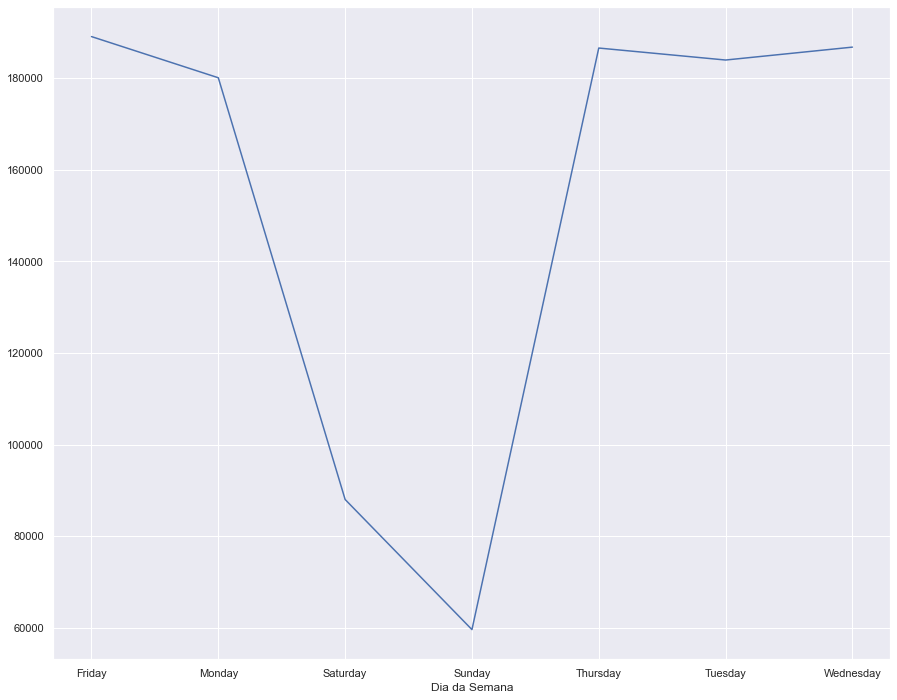

In [31]:
hour_interval_analysis['Dia da Semana'] = hour_interval_analysis['Hora Início Viagem'].dt.day_name()
hour_interval_analysis.groupby("Dia da Semana")['Viagem'].sum().plot()

In [32]:
hour_interval_analysis

,Hora Início Viagem,Viagem,Hora do Início Viagem,Dia da Semana
0,2018-07-01 00:00:00,13,0,Sunday
1,2018-07-01 02:00:00,10,2,Sunday
2,2018-07-01 04:00:00,8,4,Sunday
3,2018-07-01 06:00:00,8,6,Sunday
4,2018-07-01 08:00:00,19,8,Sunday
...,...,...,...,...
7303,2020-02-29 14:00:00,158,14,Saturday
7304,2020-02-29 16:00:00,153,16,Saturday
7305,2020-02-29 18:00:00,158,18,Saturday
7306,2020-02-29 20:00:00,68,20,Saturday


In [89]:
hour_interval_analysis['Dia da Semana'] = hour_interval_analysis['Hora Início Viagem'].dt.day_name()
hour_interval_analysis.groupby("Dia da Semana")['Viagem'].sum().reset_index()

df = hour_interval_analysis.groupby(["Dia da Semana", "Hora do Início Viagem"])['Viagem'].sum().reset_index()

In [90]:
df.groupby(["Dia da Semana", "Hora do Início Viagem"])['Viagem'].sum().reset_index()

,Dia da Semana,Hora do Início Viagem,Viagem
0,Friday,0,2114
1,Friday,2,302
2,Friday,4,398
3,Friday,6,12920
4,Friday,8,38205
...,...,...,...
79,Wednesday,14,16876
80,Wednesday,16,27595
81,Wednesday,18,40245
82,Wednesday,20,10317


<AxesSubplot:xlabel='Hora do Início Viagem'>

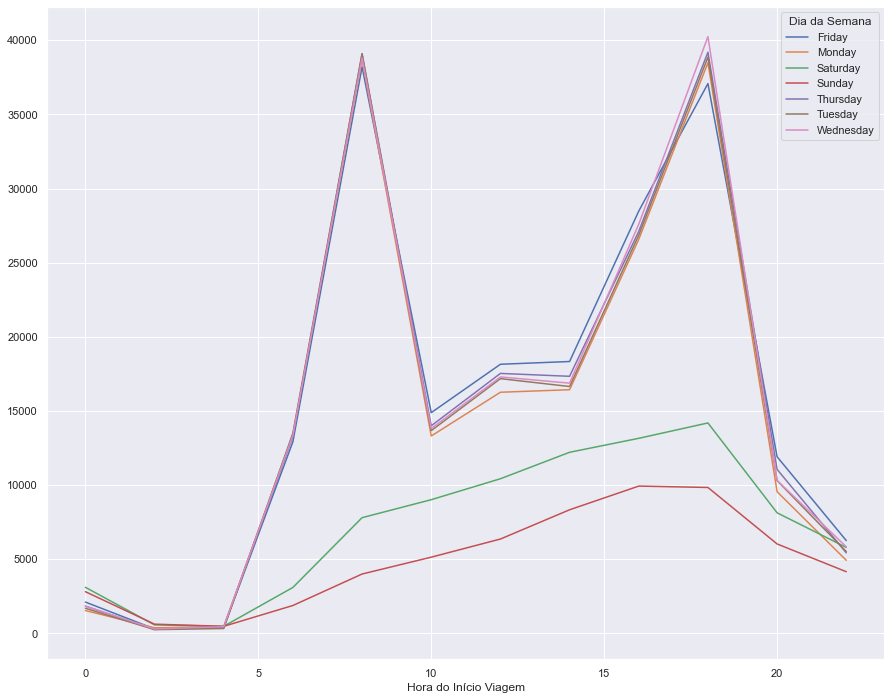

In [91]:
pd.pivot_table(df, values='Viagem', index=['Hora do Início Viagem'], columns=['Dia da Semana'], aggfunc=np.sum).plot()

-------

!!! Hora do início e de fim de viagem iguais !!!

In [155]:
data_df["Hora Início Viagem"], data_df["Hora Fim Viagem"]

(0        2018-12-01 19:13:52
 1        2018-11-26 16:45:22
 3        2018-11-02 11:47:56
 4        2018-11-08 18:15:08
 5        2018-10-09 13:23:32
                  ...        
 126532   2020-01-15 08:08:05
 126533   2020-02-04 19:30:44
 126534   2020-02-07 04:00:15
 126535   2020-01-21 16:16:43
 126536   2020-02-13 20:05:30
 Name: Hora Início Viagem, Length: 923094, dtype: datetime64[ns],
 0        2018-12-01 19:13:52
 1        2018-11-26 16:45:22
 3        2018-11-02 11:47:56
 4        2018-11-08 18:15:08
 5        2018-10-09 13:23:32
                  ...        
 126532   2020-01-15 08:08:05
 126533   2020-02-04 19:30:44
 126534   2020-02-07 04:00:15
 126535   2020-01-21 16:16:43
 126536   2020-02-13 20:05:30
 Name: Hora Fim Viagem, Length: 923094, dtype: datetime64[ns])

In [147]:
data_df["Hora Início Etapa"] = pd.to_datetime(data_df['Hora Início Etapa'], format="%Y-%m-%d %H:%M:%S")
data_df["Hora Fim Etapa"] = pd.to_datetime(data_df['Hora Fim Etapa'], format="%Y-%m-%d %H:%M:%S")

<ipython-input-147-2a64cf372fba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["Hora Início Etapa"] = pd.to_datetime(data_df['Hora Início Etapa'], format="%Y-%m-%d %H:%M:%S")
<ipython-input-147-2a64cf372fba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["Hora Fim Etapa"] = pd.to_datetime(data_df['Hora Fim Etapa'], format="%Y-%m-%d %H:%M:%S")


In [160]:
s = (data_df['Hora Fim Etapa'] - data_df['Hora Início Etapa'])
data_df['Tempo de Viagem'] = s.dt.seconds / 60

In [157]:
data_df["Grupo de Título"].unique()

array(['Assinatura', 'Título de Viagem', 'Andante 24', 'Andante Tour-1',
       'Andante Tour-3', nan, 'Funi', 'Eletrico',
       'Assinatura Metropolitano', 'Assinatura Municipal'], dtype=object)

Removido todas as linhas que tem tempo de viagem igual a 0

In [153]:
data_df = data_df[data_df['Tempo de Viagem'] != 0]

In [161]:
data_df.groupby("Grupo de Título")["Tempo de Viagem"].mean().round(1)

Grupo de Título
Andante 24                  14.5
Andante Tour-1              35.7
Andante Tour-3              34.9
Assinatura                  14.3
Assinatura Metropolitano    20.3
Assinatura Municipal        16.9
Eletrico                    13.4
Funi                         2.2
Título de Viagem            16.3
Name: Tempo de Viagem, dtype: float64

Média do tempo de viagem por Tipo de título de viagem

<AxesSubplot:xlabel='Grupo de Título'>

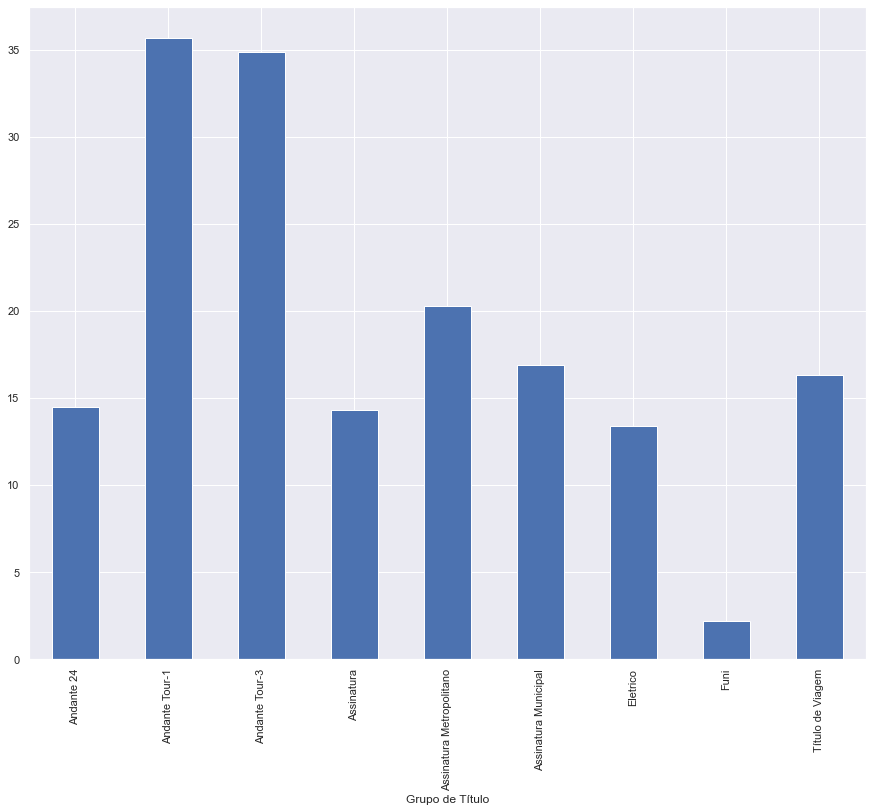

In [166]:
data_df.groupby("Grupo de Título")["Tempo de Viagem"].mean().round(1).plot.bar()

----

Há utilizadores com grupos de títulos diferentes?

In [175]:
data_df["Grupo de Título"].unique()

array(['Assinatura', 'Título de Viagem', 'Andante 24', 'Andante Tour-1',
       'Andante Tour-3', nan, 'Funi', 'Eletrico',
       'Assinatura Metropolitano', 'Assinatura Municipal'], dtype=object)

* Grupo de Título 0 significa que é NaN

In [184]:
data_df.groupby("UserHash")["Grupo de Título"].nunique().sort_values(ascending = False)

UserHash
09d166bffe5854e0d4ec77f5a27496854f025d6d    6
afe04af3847e86d944a9d57b982cdc5ca74f7ecf    6
e96ad9f22a3c8a02fb0a7ad8f1dea5533b968a0a    6
d1e1933c6cfdf455b6b3fb09b2481de1e908a0e0    6
3db7d27e3906511265854b686cd3c2ad53b5630f    6
                                           ..
e7e9afd2c133df3902b545d78877f8b87f049c4e    0
412f37daeecb0023a41014d51174e7a093c11e8b    0
e7fa87aea4b546ef586e5dfabab1c8281736b68e    0
637edeedd02fd081cd2ffcbc8836f44c62653460    0
18c4346705dcd82e23db69d1f3414e1bd0a36fdd    0
Name: Grupo de Título, Length: 9871, dtype: int64

In [188]:
data_df.loc[data_df["UserHash"] == "18c4346705dcd82e23db69d1f3414e1bd0a36fdd"]["Grupo de Título"]

120385    NaN
Name: Grupo de Título, dtype: object

In [190]:
data_df.loc[data_df["UserHash"] == "09d166bffe5854e0d4ec77f5a27496854f025d6d"]["Grupo de Título"].unique()

array(['Título de Viagem', 'Andante 24', 'Andante Tour-1',
       'Assinatura Metropolitano', 'Assinatura', 'Andante Tour-3'],
      dtype=object)

In [192]:
data_df['Tempo de Viagem']

0          4.450000
1         14.833333
3          8.666667
4          6.800000
5         15.616667
            ...    
126532    53.616667
126533    12.550000
126534    13.883333
126535     6.866667
126536    10.016667
Name: Tempo de Viagem, Length: 923094, dtype: float64

--------------

DBSCAN TEST

In [34]:
X = pd.get_dummies(count_user_trips)

In [35]:
#X = X.loc[count_user_trips['count'] > 100]

Estimated number of clusters: 22
Estimated number of noise points: 807
Silhouette Coefficient: 0.734


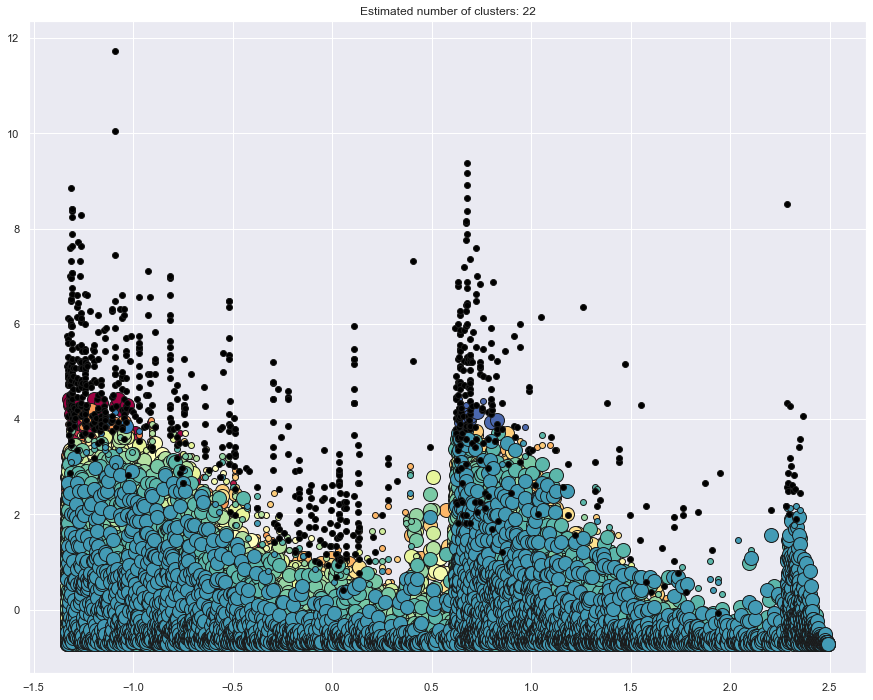

In [36]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()